<a href="https://colab.research.google.com/github/vinayshanbhag/Colaboratory/blob/master/Eigen_Vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm, eig
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def plot_vec(v, color="k", name="", title=""):
  """utility function to plot a vector"""
  x,y = v
  origin = [0],[0]
  plt.quiver(*origin,
             x,y,
             angles='xy',
             scale_units='xy',
             scale=1,
             color=color);
  sz = abs(v.max())
  plt.xlim(-sz*1.5, sz*1.5);
  plt.ylim(-sz*1.5, sz*1.5); 
  plt.grid(True,axis='both');
  #plt.gca().set_aspect("equal");
  coords = f" ({x:{'0.0f' if int(x)==x else '.2f'}},{y:{'0.0f' if int(y)==y else '.2f'}})"
  plt.text(x*1.2,y*1.2,name + coords,fontsize=14);
  plt.title(title);

Matrix A transforms a vector $\vec v$ as follows-

\begin{equation*}
  A = 
  \begin{bmatrix}
    3&1\\
    0&2\\
  \end{bmatrix}
\end{equation*}

\begin{equation*}
  \vec v
  =
  \begin{bmatrix}
    3\\
    2\\
  \end{bmatrix}
\end{equation*}

\begin{equation*}
  A
  .
  \vec v = 
  \begin{bmatrix}
    3&1\\
    0&2\\
  \end{bmatrix}
  .
  \begin{bmatrix}
    3\\
    2\\
  \end{bmatrix}
  =
  \begin{bmatrix}
    11\\
    4\\
  \end{bmatrix}
\end{equation*}

In [0]:
v = np.array([3,2])

In [0]:
A = np.array([[3,1],[0,2]])

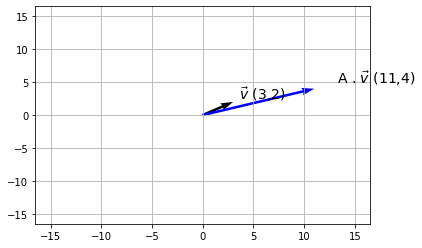

In [27]:
plot_vec(v,name=r"$\vec v $", color="k")
plot_vec(np.dot(A,v),name=r"A . $\vec v $", color="b")

Almost all vectors change direction, when they are multiplied by A. Eigen vectors are nonzero vectors that change at most by a scalar factor when a given linear transformation matrix is applied. 

Can we find non-zero vectors that only scale when a linear tranformation matrix is applied? i.e. Find vector(s) $\vec v$ such that - 

\begin{equation*}
A.\vec v = \lambda.\vec v
\end{equation*} 

where, 

$\lambda$ is a scalar

A is the tranformation matrix, and

$\vec v \neq 0$

\begin{equation*}
  A.\vec v = (\lambda*I).\vec v  \quad\quad\quad  \because I.\vec v = \vec v   
\end{equation*} 
where $I$ is the identity matrix

\begin{equation*}
  \lambda
  *
  I =
  \lambda*
  \begin{bmatrix}
    1&0\\
    0&1\\
  \end{bmatrix} =
  \begin{bmatrix}
    \lambda&0\\
    0&\lambda\\
  \end{bmatrix}
\end{equation*}

\begin{equation*}
   A.\vec v - (\lambda I)\vec v = 0
\end{equation*} 


\begin{equation*}
   (A-\lambda I).\vec v = 0
\end{equation*} 

Since we are not interested in the case where $\vec v$ = 0,

\begin{equation*}
   \det
   \begin{pmatrix}
   A-\lambda I
   \end{pmatrix}
   = 0
\end{equation*}

Find $\lambda$ such that,

\begin{equation*}
  \det
  \begin{pmatrix}
    3 - \lambda &1 \\
    0 & 2-\lambda \\
  \end{pmatrix}
  =
  0
\end{equation*}

\begin{equation*}
(3-\lambda)\times(2-\lambda)-(1\times0)=0
\end{equation*}

$\therefore \lambda = 3$ or $\lambda = 2$ 



Subtract the eigenvalues from A, to get the eigenvectors

\begin{equation*}
  \begin{bmatrix}
    0&1\\
    0&-1\\
  \end{bmatrix}
  ,
  \begin{bmatrix}
    1&1\\
    0&0\\
  \end{bmatrix}
\end{equation*}


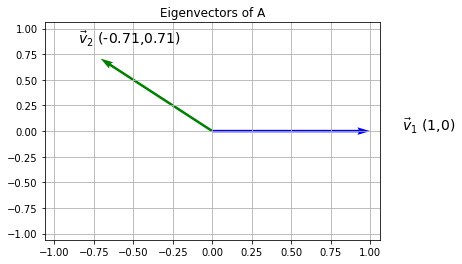

In [28]:
# using numpy.linalg.eig
eigval, eigvec = eig(A)
plot_vec(eigvec[:,0], title="Eigenvectors of A", color="b",name = r"$\vec v_1$")
plot_vec(eigvec[:,1], title="Eigenvectors of A", color="g",name = r"$\vec v_2$")

Apply transformation matrix A to these eigenvectors to confirm they are indeed only scaled (stretched or squished), but not knocked off their original span.

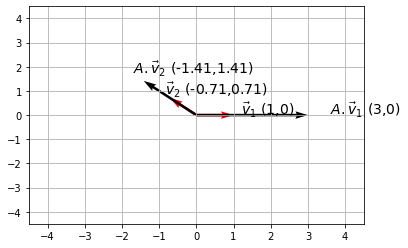

In [29]:
plot_vec(eigvec[:,1], color="r", name = r"$\vec v_2$")
plot_vec(eigvec[:,0], color="r", name = r"$\vec v_1$")

plot_vec(np.dot(A,eigvec[:,1]), color="k", name = r"$A.\vec v_2$")
plot_vec(np.dot(A,eigvec[:,0]), color="k", name = r"$A.\vec v_1$")